In [241]:
import numpy as np
import pandas as pd
from scipy.stats import f
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_1samp, ttest_ind
from statsmodels.stats.power import ttest_power
sns.set_palette("deep") 
import statistics as st

In [242]:
df1 = pd.read_csv('Wholesale Customer.csv')

In [243]:
df1.head(10)

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185
5,6,Retail,Other,9413,8259,5126,666,1795,1451
6,7,Retail,Other,12126,3199,6975,480,3140,545
7,8,Retail,Other,7579,4956,9426,1669,3321,2566
8,9,Hotel,Other,5963,3648,6192,425,1716,750
9,10,Retail,Other,6006,11093,18881,1159,7425,2098


In [244]:
df1.shape

(440, 9)

In [245]:
df1.isna().sum()

Buyer/Spender       0
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicatessen        0
dtype: int64

In [246]:
df1['Region'].unique()

array(['Other', 'Lisbon', 'Oporto'], dtype=object)

In [247]:
df1.describe(include = 'all')

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440,440,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
unique,NaN,2,3,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Hotel,Other,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,298,316,NaN,NaN,NaN,NaN,NaN,NaN
mean,220.500000,NaN,NaN,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,127.161315,NaN,NaN,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,NaN,NaN,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,110.750000,NaN,NaN,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,220.500000,NaN,NaN,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,330.250000,NaN,NaN,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000


In [248]:
df1['Total Spending'] = df1['Fresh'] + df1['Milk'] + df1['Grocery'] + df1['Frozen'] + df1['Detergents_Paper'] +  df1['Delicatessen']

In [249]:
df1.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total Spending
0,1,Retail,Other,12669,9656,7561,214,2674,1338,34112
1,2,Retail,Other,7057,9810,9568,1762,3293,1776,33266
2,3,Retail,Other,6353,8808,7684,2405,3516,7844,36610
3,4,Hotel,Other,13265,1196,4221,6404,507,1788,27381
4,5,Retail,Other,22615,5410,7198,3915,1777,5185,46100


In [250]:
region = df1.groupby(['Channel','Region']).sum().reset_index()
region

,Channel,Region,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total Spending
0,Hotel,Lisbon,14026,761233,228342,237542,184512,56081,70632,1538342
1,Hotel,Oporto,8988,326215,64519,123074,160861,13516,30965,719150
2,Hotel,Other,48020,2928269,735753,820101,771606,165990,320358,5742077
3,Retail,Lisbon,4069,93600,194112,332495,46514,148055,33695,848471
4,Retail,Oporto,5911,138506,174625,310200,29271,159795,23541,835938
5,Retail,Other,16006,1032308,1153006,1675150,158886,724420,191752,4935522


Text(0, 0.5, 'Total Spending')

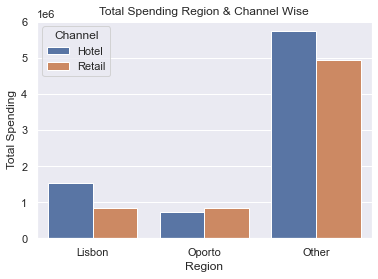

In [251]:
sns.barplot(x = 'Region', y = 'Total Spending', data = region, hue = 'Channel')

plt.title('Total Spending Region & Channel Wise')

plt.xlabel("Region")
plt.ylabel("Total Spending")

In [252]:
region = df1.groupby('Region').sum().reset_index()
region.drop('Buyer/Spender', axis = 1)

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total Spending
0,Lisbon,854833,422454,570037,231026,204136,104327,2386813
1,Oporto,464721,239144,433274,190132,173311,54506,1555088
2,Other,3960577,1888759,2495251,930492,890410,512110,10677599


Text(0, 0.5, 'Total Spending')

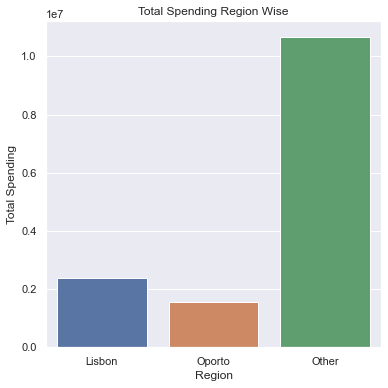

In [253]:
plt.subplots(figsize = (6,6))

sns.barplot(x = 'Region', y = 'Total Spending', data = region)

plt.title('Total Spending Region Wise')

plt.xlabel("Region")
plt.ylabel("Total Spending")

In [254]:
channel = df1.groupby('Channel').sum().reset_index()
channel.drop('Buyer/Spender', axis = 1)

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total Spending
0,Hotel,4015717,1028614,1180717,1116979,235587,421955,7999569
1,Retail,1264414,1521743,2317845,234671,1032270,248988,6619931


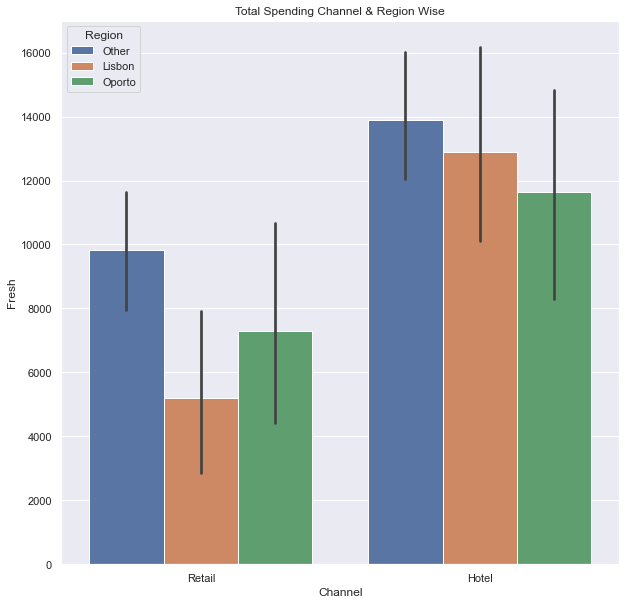

In [285]:
plt.subplots(figsize = (10,10))

sns.barplot(x = 'Channel', y = 'Fresh', data = df1, hue = 'Region')

plt.title('Total Spending Channel & Region Wise')

plt.xlabel("Channel")
plt.ylabel("Fresh");

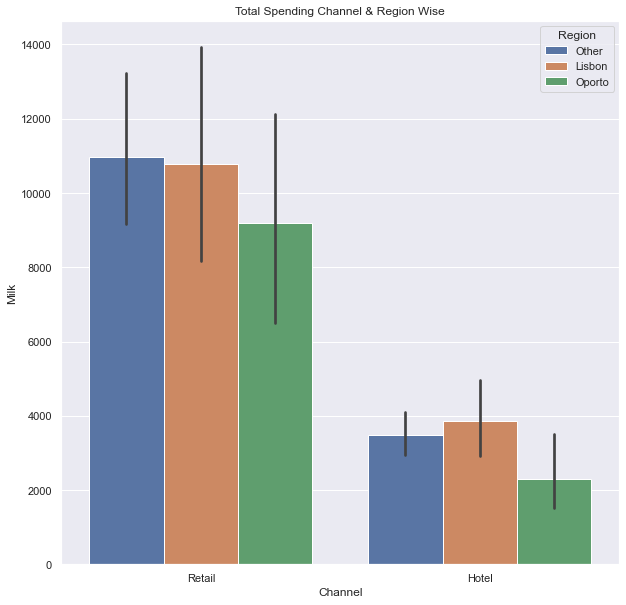

In [286]:
plt.subplots(figsize = (10,10))

sns.barplot(x = 'Channel', y = 'Milk', data = df1, hue = 'Region')

plt.title('Total Spending Channel & Region Wise')

plt.xlabel("Channel")
plt.ylabel("Milk");

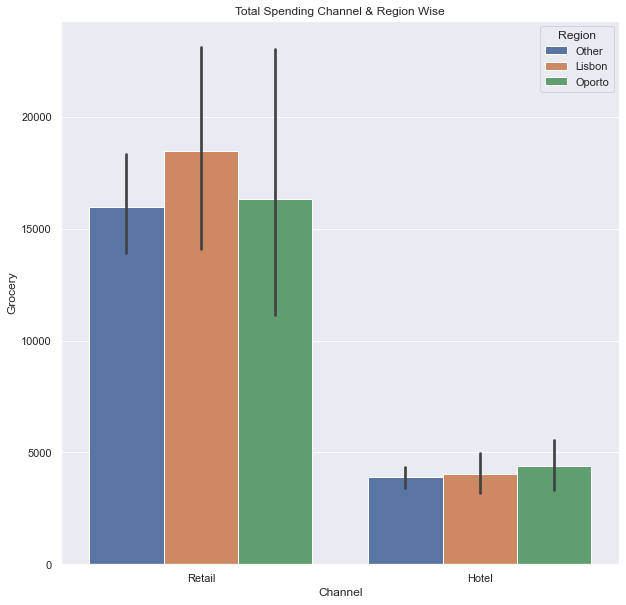

In [287]:
plt.subplots(figsize = (10,10))

sns.barplot(x = 'Channel', y = 'Grocery', data = df1, hue = 'Region')

plt.title('Total Spending Channel & Region Wise')

plt.xlabel("Channel")
plt.ylabel("Grocery");

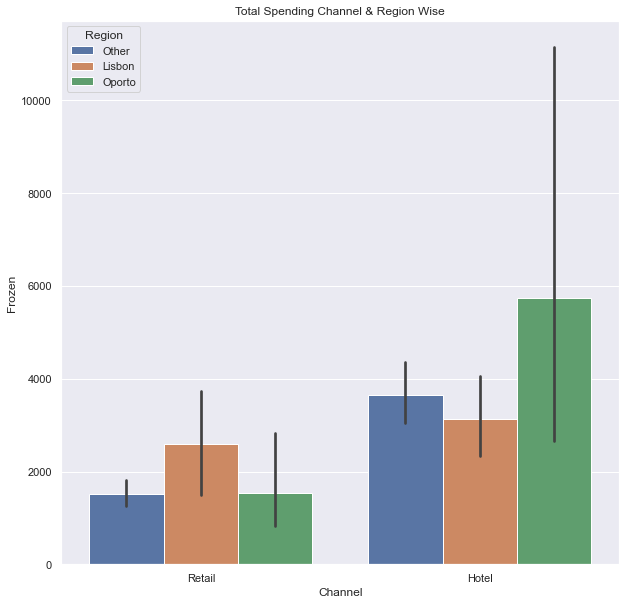

In [289]:
plt.subplots(figsize = (10,10))

sns.barplot(x = 'Channel', y = 'Frozen', data = df1, hue = 'Region')

plt.title('Total Spending Channel & Region Wise')

plt.xlabel("Channel")
plt.ylabel("Frozen");

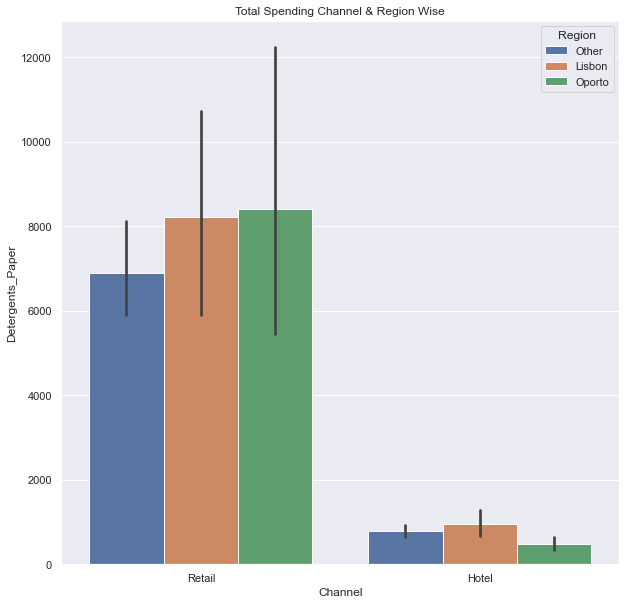

In [291]:
plt.subplots(figsize = (10,10))

sns.barplot(x = 'Channel', y = 'Detergents_Paper', data = df1, hue = 'Region')

plt.title('Total Spending Channel & Region Wise')

plt.xlabel("Channel")
plt.ylabel("Detergents_Paper");

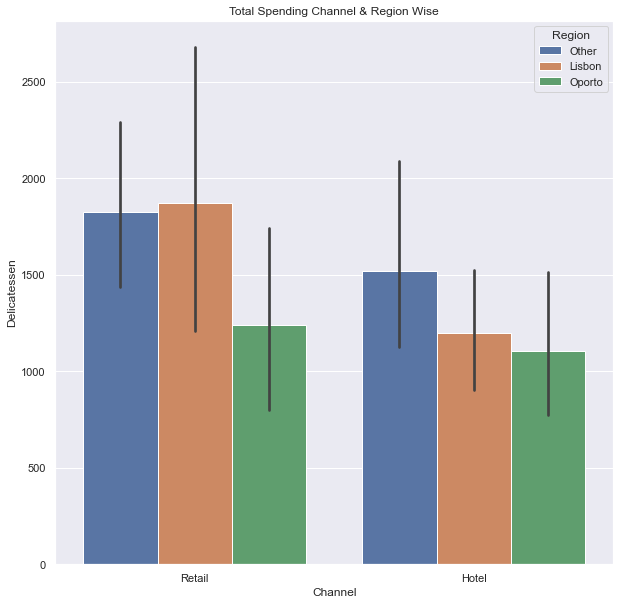

In [292]:
plt.subplots(figsize = (10,10))

sns.barplot(x = 'Channel', y = 'Delicatessen', data = df1, hue = 'Region')

plt.title('Total Spending Channel & Region Wise')

plt.xlabel("Channel")
plt.ylabel("Delicatessen");

In [256]:
stats.skew(df1['Fresh'])

2.5525826879071585

In [257]:
stats.skew(df1['Milk'])

4.039922122788577

In [258]:
stats.skew(df1['Grocery'])

3.5751872200807875

In [259]:
stats.skew(df1['Frozen'])

5.887825728957787

In [260]:
stats.skew(df1['Detergents_Paper'])

3.6194575783115934

In [261]:
stats.skew(df1['Delicatessen'])

11.113533648709097

In [262]:
df1_box = df1.drop(['Buyer/Spender','Total Spending'], axis = 1)
df1_box

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,Retail,Other,12669,9656,7561,214,2674,1338
1,Retail,Other,7057,9810,9568,1762,3293,1776
2,Retail,Other,6353,8808,7684,2405,3516,7844
3,Hotel,Other,13265,1196,4221,6404,507,1788
4,Retail,Other,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,Hotel,Other,29703,12051,16027,13135,182,2204
436,Hotel,Other,39228,1431,764,4510,93,2346
437,Retail,Other,14531,15488,30243,437,14841,1867
438,Hotel,Other,10290,1981,2232,1038,168,2125


In [ ]:
plt.subplots(figsize = (6,10))

sns.barplot(x = 'Channel', y = 'Total Spending', data = channel)

plt.title('Total Spending Channel Wise')

plt.xlabel("Channel")
plt.ylabel("Total Spending")

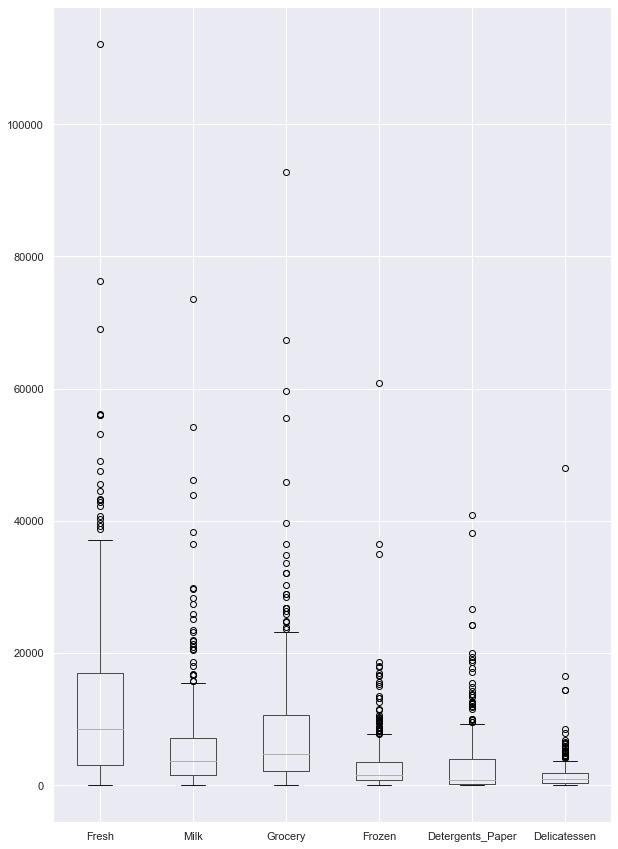

In [263]:
fig = plt.figure(figsize=(10,15))
df1_box.boxplot()

In [264]:
df1_1 = df1_box.drop('Channel', axis = 1)

In [265]:
df1_1.skew()

Fresh                2.561323
Milk                 4.053755
Grocery              3.587429
Frozen               5.907986
Detergents_Paper     3.631851
Delicatessen        11.151586
dtype: float64

In [266]:
df1_std = df1_1.std()
df1_std

Fresh               12647.328865
Milk                 7380.377175
Grocery              9503.162829
Frozen               4854.673333
Detergents_Paper     4767.854448
Delicatessen         2820.105937
dtype: float64

In [267]:
df1_variability = df1_1.describe().T
df1_variability

,count,mean,std,min,25%,50%,75%,max
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicatessen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


In [268]:
index = df1_variability

In [269]:
df1_variability['Range'] = df1_variability['max'] - df1_variability['min']
df1_variability['IQR'] = df1_variability['75%'] - df1_variability['25%']
df1_variability['Skewness'] = df1_1.skew()
df1_variability['CV'] = df1_variability['std'] / df1_variability['mean']

In [270]:
df1_variability

,count,mean,std,min,25%,50%,75%,max,Range,IQR,Skewness,CV
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0,112148.0,13806.00,2.561323,1.053918
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0,73443.0,5657.25,4.053755,1.273299
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0,92777.0,8502.75,3.587429,1.195174
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0,60844.0,2812.00,5.907986,1.580332
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0,40824.0,3665.25,3.631851,1.654647
Delicatessen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0,47940.0,1412.00,11.151586,1.849407


In [271]:
Fresh_variance = st.variance(df1_1['Fresh'])
Milk_variance = st.variance(df1_1['Milk'])
Grocery_variance = st.variance(df1_1['Grocery'])
Frozen_variance = st.variance(df1_1['Frozen'])
Detergents_Paper_variance = st.variance(df1_1['Detergents_Paper'])
Delicatessen_variance = st.variance(df1_1['Delicatessen'])

In [272]:
Variance = Fresh_variance,Milk_variance,Grocery_variance,Frozen_variance,Detergents_Paper_variance,Delicatessen_variance

In [273]:
df1_variability['Variance'] = Variance

In [274]:
df1_variability

,count,mean,std,min,25%,50%,75%,max,Range,IQR,Skewness,CV,Variance
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0,112148.0,13806.00,2.561323,1.053918,1.599549e+08
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0,73443.0,5657.25,4.053755,1.273299,5.446997e+07
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0,92777.0,8502.75,3.587429,1.195174,9.031010e+07
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0,60844.0,2812.00,5.907986,1.580332,2.356785e+07
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0,40824.0,3665.25,3.631851,1.654647,2.273244e+07
Delicatessen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0,47940.0,1412.00,11.151586,1.849407,7.952997e+06


<ipython-input-275-8e9496599313>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df1_box.hist(ax = ax);


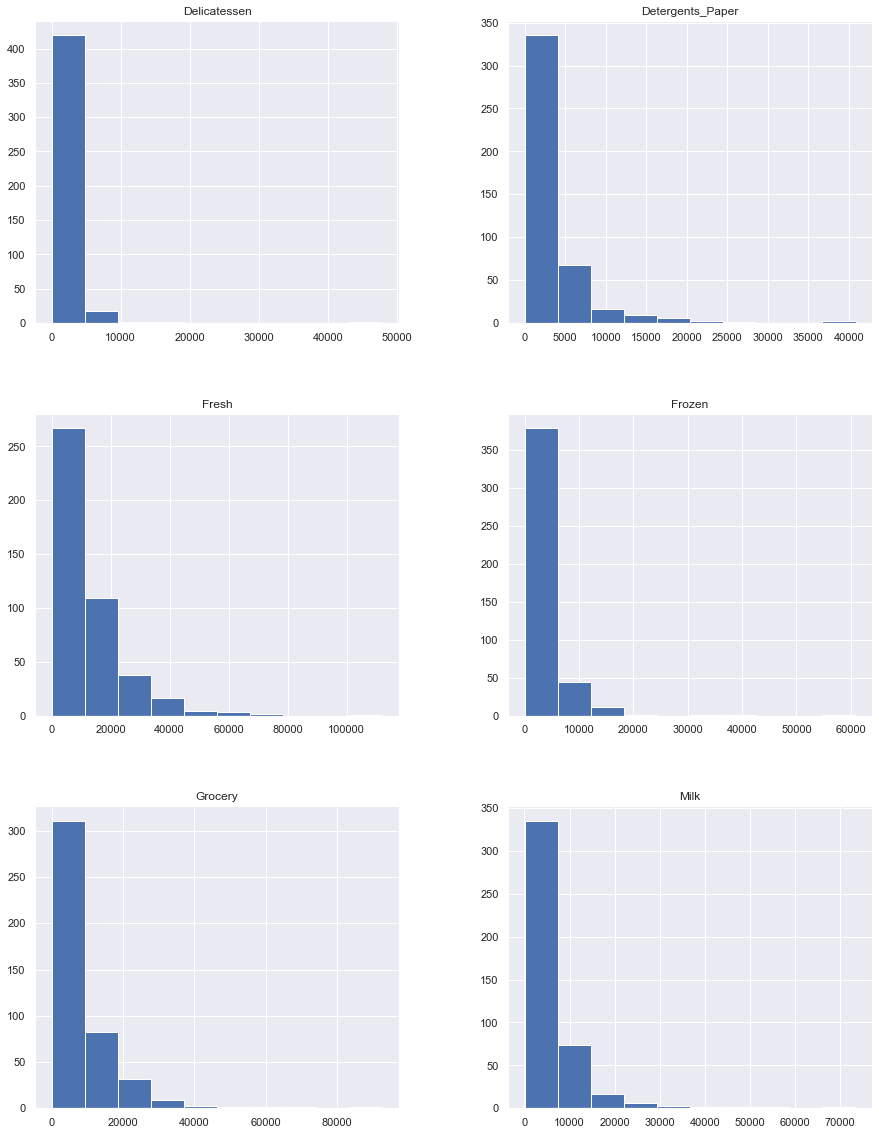

In [275]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df1_box.hist(ax = ax);

In [276]:
corr = df1_box.corr()

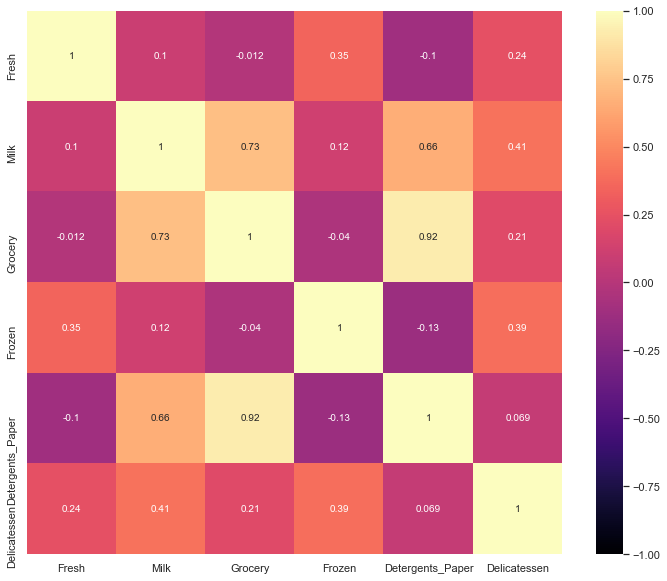

In [277]:
plt.figure(figsize = (12,10))
sns.heatmap(corr, annot=True, cmap = 'magma', vmin=-1,vmax=1)

## Problem Statement 2: 
### The Student News Service at Clear Mountain State University (CMSU) has decided to gather data about the undergraduate students that attend CMSU. CMSU creates and distributes a survey of 14 questions and receives responses from 62 undergraduates (stored in the Survey data set).

In [2]:
df2 = pd.read_csv('Survey-1.csv')

In [3]:
df2.head(10)

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100
5,6,Female,22,Senior,Economics/Finance,Undecided,2.3,Unemployed,78.0,3,2,700,Laptop,30
6,7,Female,21,Junior,Other,Undecided,3.0,Part-Time,50.0,1,3,500,Laptop,50
7,8,Female,22,Senior,Other,Undecided,3.1,Full-Time,80.0,1,2,200,Tablet,300
8,9,Female,20,Junior,Management,Yes,3.6,Unemployed,30.0,0,4,500,Laptop,400
9,10,Female,21,Senior,Economics/Finance,Undecided,3.3,Part-Time,37.5,1,4,200,Laptop,100


In [4]:
df2.shape

(62, 14)

In [5]:
df2.isna().sum()

ID                   0
Gender               0
Age                  0
Class                0
Major                0
Grad Intention       0
GPA                  0
Employment           0
Salary               0
Social Networking    0
Satisfaction         0
Spending             0
Computer             0
Text Messages        0
dtype: int64

In [6]:
df2.describe(include = 'all')

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
count,62.000000,62,62.000000,62,62,62,62.000000,62,62.000000,62.000000,62.000000,62.000000,62,62.000000
unique,NaN,2,NaN,3,8,3,NaN,3,NaN,NaN,NaN,NaN,3,NaN
top,NaN,Female,NaN,Senior,Retailing/Marketing,Yes,NaN,Part-Time,NaN,NaN,NaN,NaN,Laptop,NaN
freq,NaN,33,NaN,31,14,28,NaN,43,NaN,NaN,NaN,NaN,55,NaN
mean,31.500000,NaN,21.129032,NaN,NaN,NaN,3.129032,NaN,48.548387,1.516129,3.741935,482.016129,NaN,246.209677
std,18.041619,NaN,1.431311,NaN,NaN,NaN,0.377388,NaN,12.080912,0.844305,1.213793,221.953805,NaN,214.465950
min,1.000000,NaN,18.000000,NaN,NaN,NaN,2.300000,NaN,25.000000,0.000000,1.000000,100.000000,NaN,0.000000
25%,16.250000,NaN,20.000000,NaN,NaN,NaN,2.900000,NaN,40.000000,1.000000,3.000000,312.500000,NaN,100.000000
50%,31.500000,NaN,21.000000,NaN,NaN,NaN,3.150000,NaN,50.000000,1.000000,4.000000,500.000000,NaN,200.000000
75%,46.750000,NaN,22.000000,NaN,NaN,NaN,3.400000,NaN,55.000000,2.000000,4.000000,600.000000,NaN,300.000000


### 2.1.1. Gender and Major

In [7]:
pd.crosstab(df2['Gender'], df2['Major'])

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


### 2.1.2. Gender and Grad Intention

In [8]:
pd.crosstab(df2['Gender'], df2['Grad Intention'])

Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


### 2.1.3. Gender and Employment

In [9]:
pd.crosstab(df2['Gender'], df2['Employment'])

Employment,Full-Time,Part-Time,Unemployed
Gender,,,
Female,3,24,6
Male,7,19,3


### 2.1.4. Gender and Computer

In [10]:
pd.crosstab(df2['Gender'], df2['Computer'])

Computer,Desktop,Laptop,Tablet
Gender,,,
Female,2,29,2
Male,3,26,0


### 2.2.1 What is the probability that a randomly selected CMSU student will be male?

In [11]:
df2['Gender'].value_counts()

Female    33
Male      29
Name: Gender, dtype: int64

In [12]:
Total_Male = 29

In [13]:
Total_Students = 62

In [14]:
print("Probability of Student will be male",round(Total_Male / Total_Students,3) )

Probability of Student will be male 0.468


### 2.2.2 What is the probability that a randomly selected CMSU student will be female?

In [15]:
Total_Female = 33

In [16]:
print("Probability of Student will be female",round(Total_Female / Total_Students,3))

Probability of Student will be female 0.532


### 2.3.1 Find the conditional probability of different majors among the male students in CMSU.

In [17]:
## as per the table above 2.1.1
Male_Accounting = 4 
Male_CIS = 1
Male_Economics = 4
Male_International = 2
Male_Management = 6
Male_Other = 4
Male_Retailing = 5
Male_Undecided = 3

In [18]:
probability_acct_male = Male_Accounting / Total_Male
round(probability_acct_male,3)

0.138

In [19]:
probability_cis_male = Male_CIS / Total_Male
round(probability_cis_male,3)

0.034

In [20]:
probability_Male_Economics = Male_Economics / Total_Male
round(probability_Male_Economics,3)

0.138

In [21]:
probability_Male_International = Male_International / Total_Male
round(probability_Male_International,3)

0.069

In [22]:
probability_Male_Management = Male_Management / Total_Male
round(probability_Male_Management,3)

0.207

In [23]:
probability_Male_Other = Male_Other / Total_Male
round(probability_Male_Other,3)

0.138

In [24]:
probability_Male_Retailing = Male_Retailing / Total_Male
round(probability_Male_Retailing,3)

0.172

In [25]:
probability_Male_Undecided = Male_Undecided / Total_Male
round(probability_Male_Undecided,3)

0.103

### 2.3.2 Find the conditional probability of different majors among the female students of CMSU.

In [26]:
## as per the table above 2.1.1
Female_Accounting = 3 
Female_CIS = 3
Female_Economics = 7
Female_International = 4
Female_Management = 4
Female_Other = 3
Female_Retailing = 9
Female_Undecided = 0

In [27]:
pd.crosstab(df2['Gender'], df2['Major'])

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


In [28]:
probability_Female_Accounting = Female_Accounting / Total_Female
round(probability_Female_Accounting,3)

0.091

In [29]:
probability_Female_CIS = Female_CIS / Total_Female
round(probability_Female_CIS,3)

0.091

In [30]:
probability_Female_Economics = Female_Economics / Total_Female
round(probability_Female_Economics,3)

0.212

In [31]:
probability_Female_International = Female_International / Total_Female
round(probability_Female_International,3)

0.121

In [32]:
probability_Female_Management = Female_Management / Total_Female
round(probability_Female_Management,3)

0.121

In [33]:
probability_Female_Other = Female_Other / Total_Female
round(probability_Female_Other,3)

0.091

In [34]:
probability_Female_Retailing = Female_Retailing / Total_Female
round(probability_Female_Retailing ,3)

0.273

In [35]:
probability_Female_Undecided = Female_Undecided/ Total_Female
round(probability_Female_Undecided ,3)

0.0

### 2.4.1 Find the probability That a randomly chosen student is a male and intends to graduate.

In [36]:
Male_intend_to_study = 17

In [60]:
probability_male_to_study = Male_intend_to_study/Total_Male
round(probability_male_to_study,3)

0.586

### 2.4.2 Find the probability that a randomly selected student is a female and does NOT have a laptop.

In [38]:
pd.crosstab(df2['Gender'], df2['Computer'])

Computer,Desktop,Laptop,Tablet
Gender,,,
Female,2,29,2
Male,3,26,0


In [41]:
Female_no_laptop = 4

In [61]:
probability_Female_no_laptop = Female_no_laptop/Total_Female
round(probability_Female_no_laptop,3)

0.121

### 2.5.1 Find the probability that a randomly chosen student is either a male or has a full-time employment

In [63]:
pd.crosstab(df2['Gender'], df2['Employment'])

Employment,Full-Time,Part-Time,Unemployed
Gender,,,
Female,3,24,6
Male,7,19,3


In [64]:
Total_Male_fulltime = 7

In [65]:
Total_fulltime = 10

In [68]:
prob_male_fullemp = ((Total_Male + Total_fulltime) - Total_Male_fulltime) / Total_Students
round(prob_male_fullemp,3)

0.516

### 2.5.2 Find the conditional probability that given a female student is randomly chosen, she is majoring in international business or management.

In [70]:
pd.crosstab(df2['Gender'], df2['Major'])

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


In [71]:
Female_International_business = 4
Female_Management = 4

In [73]:
probablity_female_buinsess_managment = (Female_International_business /Total_Female) + (Female_Management /Total_Female )

In [75]:
round(probablity_female_buinsess_managment,3)

0.242

### 2.6 Construct a contingency table of Gender and Intent to Graduate at 2 levels (Yes/No). The Undecided students are not considered now and the table is a 2x2 table. Do you think graduate intention and being female are independent events?

In [76]:
contingency_table = pd.crosstab(df2['Gender'], df2['Grad Intention'])

In [96]:
contingency_table.drop('Undecided', axis = 1)

Grad Intention,No,Yes
Gender,,
Female,9,11
Male,3,17


In [98]:
corr = contingency_table.corr()

## 2.7 Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending and Text Messages. Answer the following questions based on the data

### 2.7.1 If a student is chosen randomly, what is the probability that his/her GPA is less than 3?

In [114]:
gpa = pd.crosstab(df2['Gender'], (df2['GPA']<3))
gpa

GPA,False,True
Gender,,
Female,25,8
Male,20,9


In [115]:
gpa_less_than_3 = 17

In [124]:
prob_gpa_less_than_3 = gpa_less_than_3 /Total_Students
round(prob_gpa_less_than_3,3)

0.274

### 2.7.2 Find conditional probability that a randomly selected male earns 50 or more. Find conditional probability that a randomly selected female earns 50 or more.

In [125]:
salary = pd.crosstab(df2['Gender'], (df2['Salary']>= 50))
salary

Salary,False,True
Gender,,
Female,15,18
Male,15,14


### 2.8.1 Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending and Text Messages. For each of them comment whether they follow a normal distribution.

In [174]:
df2_selected = df2.iloc[:,[6,8,11,13]]

In [176]:
df2_selected.describe()

,GPA,Salary,Spending,Text Messages
count,62.000000,62.000000,62.000000,62.000000
mean,3.129032,48.548387,482.016129,246.209677
std,0.377388,12.080912,221.953805,214.465950
min,2.300000,25.000000,100.000000,0.000000
25%,2.900000,40.000000,312.500000,100.000000
50%,3.150000,50.000000,500.000000,200.000000
75%,3.400000,55.000000,600.000000,300.000000
max,3.900000,80.000000,1400.000000,900.000000


<ipython-input-170-1f66de721bb8>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df2_selected.hist(ax = ax);


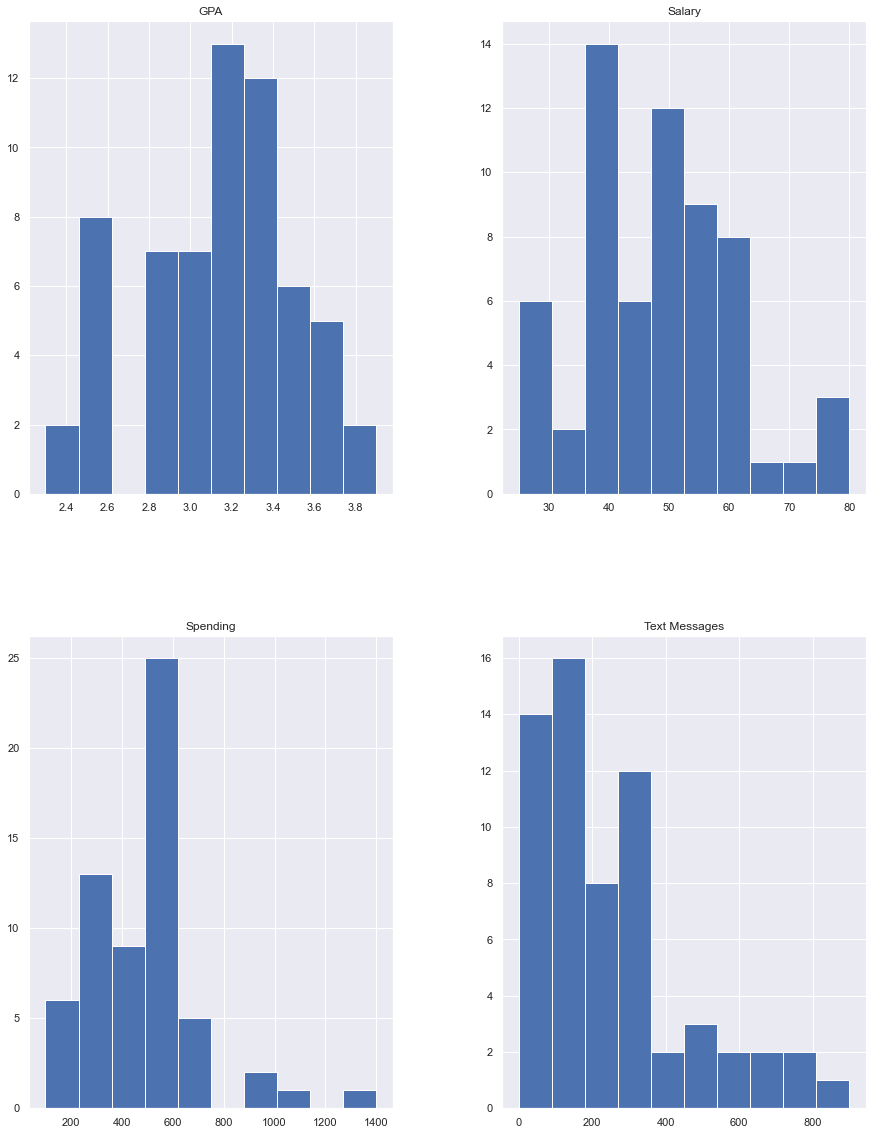

In [170]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df2_selected.hist(ax = ax);

Text(0, 0.5, 'GPA')

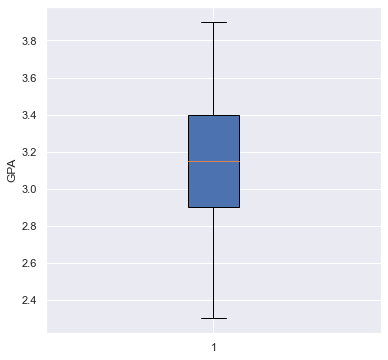

In [172]:
fig = plt.figure(figsize = (6,6))
plt.boxplot(x = df2_selected['GPA'],patch_artist=True);
plt.ylabel("GPA")

Text(0, 0.5, 'Salary')

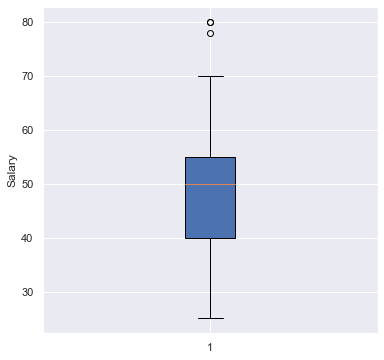

In [166]:
fig = plt.figure(figsize = (6,6))
plt.boxplot(x = df2_selected['Salary'],patch_artist=True);
plt.ylabel("Salary")

Text(0, 0.5, 'Spending')

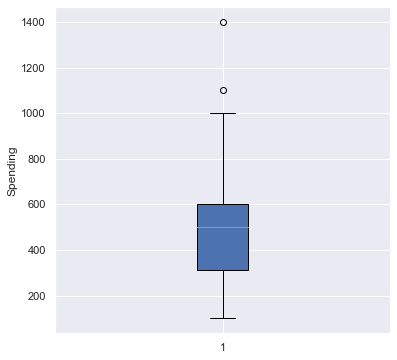

In [173]:
fig = plt.figure(figsize = (6,6))
plt.boxplot(x = df2_selected['Spending'],patch_artist=True);
plt.ylabel("Spending")

Text(0, 0.5, 'Text Messages')

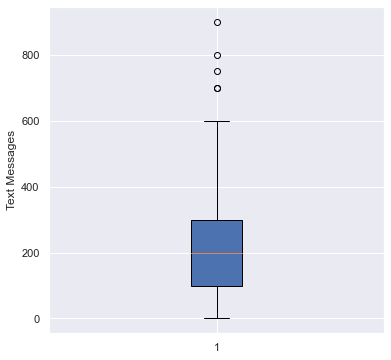

In [177]:
fig = plt.figure(figsize = (6,6))
plt.boxplot(x = df2_selected['Text Messages'],patch_artist=True);
plt.ylabel("Text Messages")

#### Problem 3 (Download Data)

## An important quality characteristic used by the manufacturers of ABC asphalt shingles is the amount of moisture the shingles contain when they are packaged. Customers may feel that they have purchased a product lacking in quality if they find moisture and wet shingles inside the packaging.   In some cases, excessive moisture can cause the granules attached to the shingles for texture and colouring purposes to fall off the shingles resulting in appearance problems. To monitor the amount of moisture present, the company conducts moisture tests. A shingle is weighed and then dried. The shingle is then reweighed, and based on the amount of moisture taken out of the product, the pounds of moisture per 100 square feet are calculated. The company would like to show that the mean moisture content is less than 0.35 pound per 100 square feet.

### The file (A & B shingles.csv) includes 36 measurements (in pounds per 100 square feet) for A shingles and 31 for B shingles.

In [181]:
df3 = pd.read_csv('A & B shingles-1.csv')

In [188]:
df3.head()

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37


In [186]:
df3.shape

(36, 2)

In [190]:
df3.isna().sum()

A    0
B    5
dtype: int64

In [192]:
df3.describe()

,A,B
count,36.000000,31.000000
mean,0.316667,0.273548
std,0.135731,0.137296
min,0.130000,0.100000
25%,0.207500,0.160000
50%,0.290000,0.230000
75%,0.392500,0.400000
max,0.720000,0.580000


### 3.1 Do you think there is evidence that mean moisture contents in both types of shingles are within the permissible limits? State your conclusions clearly showing all steps.

#### Summary:

Sample Size n > 30 for both samples A&B Shingles


Alpha or Level of Significance is considered at 0.05 as its not mentioned

Population standard deviation is not known

We will be applying T Test

In [201]:
alpha_value = 0.05

### Case 1: A Shingles 

Step1: Define Null & Alternate Hypothesis 

Null Hypothesis Ho: muA = 0.35


Alternate Hypothesis Ha: muA > 0.35


In [215]:
t_statistic, p_value = ttest_1samp(df3['A'],0.35)

In [216]:
print('One sample t test \nt statistic: {0} p value: {1} '.format(t_statistic, p_value))

One sample t test 
t statistic: -1.4735046253382782 p value: 0.14955266289815025 


In [217]:
print('Level of Significance: %.2f' %alpha_value)
if p_value < alpha_value:
    print('We Have Evidence to reject null hypothesis since p value < Level of significance')
else:
    print('We Have Fail or No Evidence to reject the null hypothesis since p value > Level of significance') 
    
print("Our one-sample t-test p-value=", p_value)

Level of Significance: 0.05
We Have Fail or No Evidence to reject the null hypothesis since p value > Level of significance
Our one-sample t-test p-value= 0.14955266289815025


### Case 1: B Shingles 

Step1: Define Null & Alternate Hypothesis 

Null Hypothesis Ho: muB = 0.35

Alternate Hypothesis Ho: muB > 0.35

In [225]:
df3_drop = df3['B'].dropna()

In [228]:
t_statistic, p_value = ttest_1samp(df3_drop,0.35)

In [231]:
print('One sample t test \nt statistic: {0} p value: {1} '.format(t_statistic, p_value))

One sample t test 
t statistic: -3.1003313069986995 p value: 0.004180954800638363 


In [233]:
print('Level of Significance: %.2f' %alpha_value)
if p_value < alpha_value:
    print('We Have Evidence to reject null hypothesis since p value < Level of significance')
else:
    print('We Have Fail or No Evidence to reject the null hypothesis since p value > Level of significance') 
    
print("Our one-sample t-test p-value=", p_value)

Level of Significance: 0.05
We Have Evidence to reject null hypothesis since p value < Level of significance
Our one-sample t-test p-value= 0.004180954800638363


### 3.2 Do you think that the population means for shingles A and B are equal? Form the hypothesis and conduct the test of the hypothesis. What assumption do you need to check before the test for equality of means is performed?

Sample Size n > 30 for both samples A&B Shingles

Alpha or Level of Significance is considered at 0.05 as its not mentioned

Population standard deviation is not known

### Note: Since we will be comparing whether population mean of A & B are equal or not, and data of A & B Shingles are independent we will be applying two sample t-test

Define Null & Alternate Hypothesis 

Assume that the population mean of A shingles is uA, similarly the population mean of B shingles is uB

Null hypothesis Ho: uA = uB

Alternate hypothesis Ha: uA =! uB

In [236]:
t_statistic, p_value  = ttest_ind(df3['A'],df3_drop)
print('tstat',t_statistic)    
print('P Value',p_value)    

tstat 1.289628271966112
P Value 0.2017496571835328


In [238]:
alpha_level = 0.05

if p_value < alpha_level:
    print('We have enough evidence to reject the null hypothesis in favour of alternative hypothesis')
    print('We conclude that the population mean of both A & B Shingles are not equal.')
else:
    print('We do not have enough evidence to reject the null hypothesis in favour of alternative hypothesis')
    print('We conclude that the population mean of both A & B Shingles are equal.')

We do not have enough evidence to reject the null hypothesis in favour of alternative hypothesis
We conclude that the population mean of both A & B Shingles are equal.
